In [65]:
import pandas as pd

hatespeech = pd.read_csv("../data/hatespeech.csv")

hatespeech = hatespeech[hatespeech['hate_speech'] > 0.5]
hatespeech.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,12039.054476,3.382936,1.392349,1.827759,0.162828,0.764070
std,7351.680408,1.124272,0.658461,1.256703,0.594213,0.530344
min,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,5575.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,11383.000000,3.000000,1.000000,2.000000,0.000000,1.000000
75%,18457.000000,3.000000,2.000000,2.000000,0.000000,1.000000
max,25290.000000,9.000000,7.000000,8.000000,8.000000,2.000000


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english'
)

tfidf_vecs  = vectorizer.fit_transform(hatespeech['tweet'])

In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)

result = km.fit(tfidf_vecs)
result

KMeans(n_clusters=10)

In [68]:
hatespeech['predictions'] = km.predict(tfidf_vecs)

pd.options.display.max_colwidth = 500
preds = hatespeech[['tweet', 'predictions']]

preds

,tweet,predictions
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",2
9,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",1
14,""" bitch get up off me """,1
17,""" bitch who do you love """,1
49,""" these hoes like niggas that spend money not talk bout it """,6
...,...,...
24753,you ain't gotta be a dyke to like hoes,6
24762,"you got niggas, and i got bitches.",9
24773,you niggers cheat on ya gf's? smh....,8
24776,you're all niggers,8


In [69]:
preds.groupby('predictions').nunique()

,tweet
predictions,
0,244
1,862
2,147
3,325
4,310
5,277
6,332
7,245
8,1865


<BarContainer object of 8 artists>

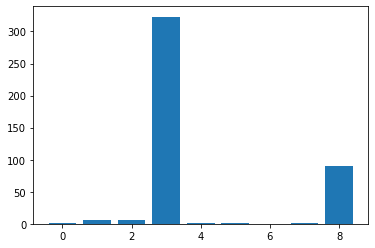

In [92]:
import matplotlib.pyplot as plt

def groups_containing(term):
    result = preds[preds['tweet'].str.contains(term)]
    return result.groupby('predictions').nunique()


df = groups_containing('')
plt.bar(df.index, df['tweet'])

In [72]:
preds[hatespeech['predictions'] == 5]

,tweet,predictions
77,"""@BeEasyJrizzy: u ever kill a ant on the sidewalk and think damn what if that nigga was on his way to get some pussy""No bs must b &gt;30%chance",5
99,"""@ChandlerParsons: How bout them Cowboys!!!!"" Shutup pussy",5
177,"""@Lipe_the_Great: &#8220;@h0rheyd: ""@Lipe_the_Great: Shut up zoe"" fight me pussy&#8221; for zoe? I'm good, man."" You are good ma'am. Move along now",5
289,"""@_BaDa_Bing: I only punch real niggas in the face cause a pussy Nigga is gonna punch me right back"" Strong Mush or Shake..",5
350,"""@jboii2: ima keep on giving these pussy ass niggas ah reason to hate !""",5
...,...,...
24366,pussy ass bitches,5
24436,smh RT @uglyhxes Tyga shoulda knew Blacc Chyna was a hoe when his son crip walked out her pussy.,5
24513,the devils been sending his workers to get at me lately... pussy fuck boy try harder.. can't let'em throw me off my 1... 2ssss,5
24551,these pussy ass niggas ain't bout that life,5
